In [1]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# 스케일링--------------------

from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

#근데 사실 이 함수를 안쓰고 클래스를 쓴다. -- CV할때 사용할수가 없다. 그래서 객체에 저장하는 방법을 사용하는데.... 

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))


# 알으로 스케일링은 아래의것을 쓰도록 한다.==================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # scaler가 스케일링을 해줌
scaler.fit(data1)
data2 = scaler.transform(data1) #<--- test파일로 CV할때는 여기에만 test파일쓰고 위에꺼는 train꺼만~

data1.std(), data2.std()
#--- 이렇게 하는 이유는 CV때문임--- 사실 from_formula로 스케일링했으면 지가알아서 다 하고있다.

old mean: [ 5.84333333  3.054       3.75866667  1.19866667]
old std:  [ 0.82530129  0.43214658  1.75852918  0.76061262]
new mean: [ -1.69031455e-15  -1.63702385e-15  -1.48251781e-15  -1.62314606e-15]
new std:  [ 1.  1.  1.  1.]


(1.974000985027335, 1.0)

In [11]:
# 정규화-----------------------------(개별 데이터의 상대적 크기가 중요할때)

from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [ 2.  1.  0.  1.  2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [ 1.  1.  1.  1.  1.]


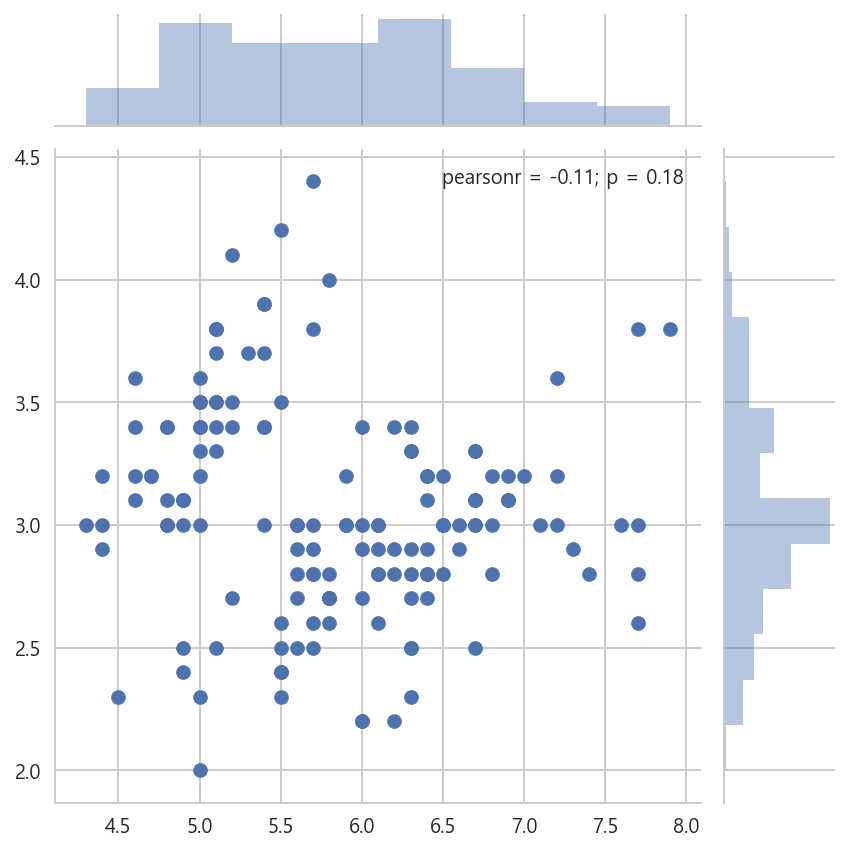

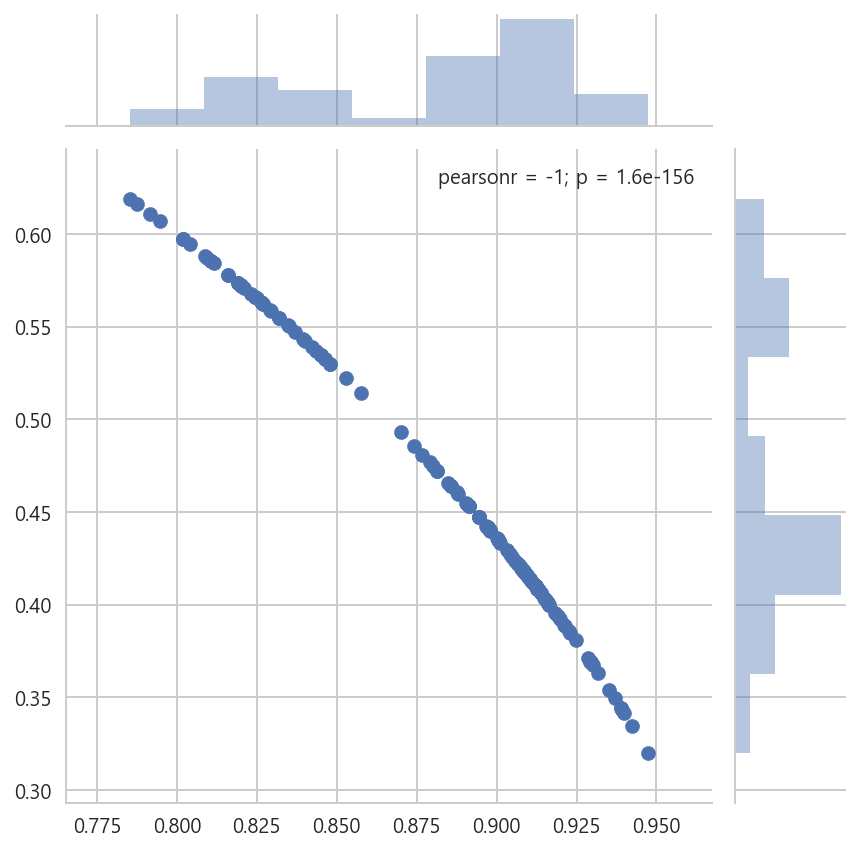

In [12]:
sns.jointplot(data1[:,0], data1[:,1])
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

In [13]:
# One-Hot-Encoder

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [14]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_


(array([3]), array([0, 3], dtype=int32), array([0, 1, 2], dtype=int64))

In [15]:
ohe.transform(X).toarray()


array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [16]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
X


array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [18]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_


(array([2, 3, 5]),
 array([ 0,  2,  5, 10], dtype=int32),
 array([0, 1, 2, 3, 4, 5, 6, 7, 9], dtype=int64))

In [19]:
ohe.transform(X).toarray()


array([[ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [20]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()


array([[ 1.,  0.,  0.,  0.,  4.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  1.,  2.]])

In [22]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_


(array([3]), array([0, 3], dtype=int32), array([0, 1, 2], dtype=int64))

In [23]:
# 여기부터는 링크참조해라-----------------------------------------------------------------------
# https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/



# Imputer ---- 누락된데이터 채운다 (으악!!!)

In [24]:
# Binarizer ---- 기준값을 가지고 크고 작은걸 판단하여 결과를 0,1로 구분한다.

In [ ]:
# Polynomial Features ----- 알아서 제곱,세제곰,네제곱,X1X2 등의 컬럼을 만들고자 하면 사용한다. 

In [25]:
# Function Transformer ----- 위의것 말고 다른 함수의 결과값으로 만들고자 하는 경우

In [26]:
# Lable Encoder ---- 라벨링 알아서 해준다, 반대로도 바꿀 수 있다

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
le.fit(y)
le.classes_


array(['A', 'B', 'C'],
      dtype='<U1')

In [27]:
y2 = le.transform(y) 
y2


array([0, 1, 0, 0, 1, 2, 2, 0, 2, 1], dtype=int64)

In [28]:
le.inverse_transform(y2) # 이게 반대로 바꿔주는 함수

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'],
      dtype='<U1')

In [29]:
# Label Binarizer ----이름이 좀 이상한데...어쨌든 Y값을 One-Hot-Encoding 해주는 존재임... 곧 쓸꺼야

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)


LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [30]:
lb.classes_


array(['A', 'B', 'C'],
      dtype='<U1')

In [31]:
y2 = lb.transform(y)
y2


array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [32]:
lb.inverse_transform(y2)


array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'],
      dtype='<U1')

# 분류성능평가
## FDS 및 ROC커브

In [2]:
from sklearn.metrics import *

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))


             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state=1)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X, y)
y_hat2 = model2.predict(X)


In [5]:
print(confusion_matrix(y, y_hat1))

[[8853   94]
 [ 397  656]]


In [6]:
print(confusion_matrix(y, y_hat2))

[[8894   53]
 [ 397  656]]


In [7]:
print(classification_report(y, model1.predict(X)))


             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [10]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

fpr1, tpr1, thresholds1 = roc_curve(y, model1.predict_proba(X)[:, 1])
fpr2, tpr2, thresholds1 = roc_curve(y, model2.predict_proba(X)[:, 1])


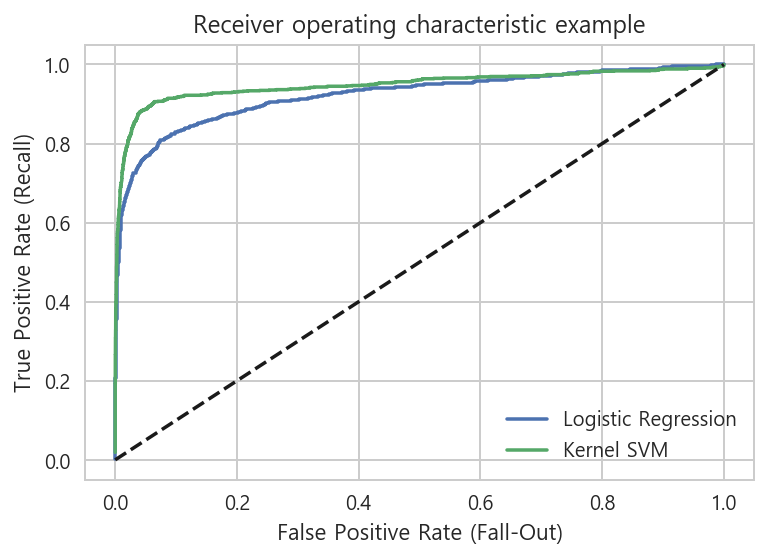

In [11]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


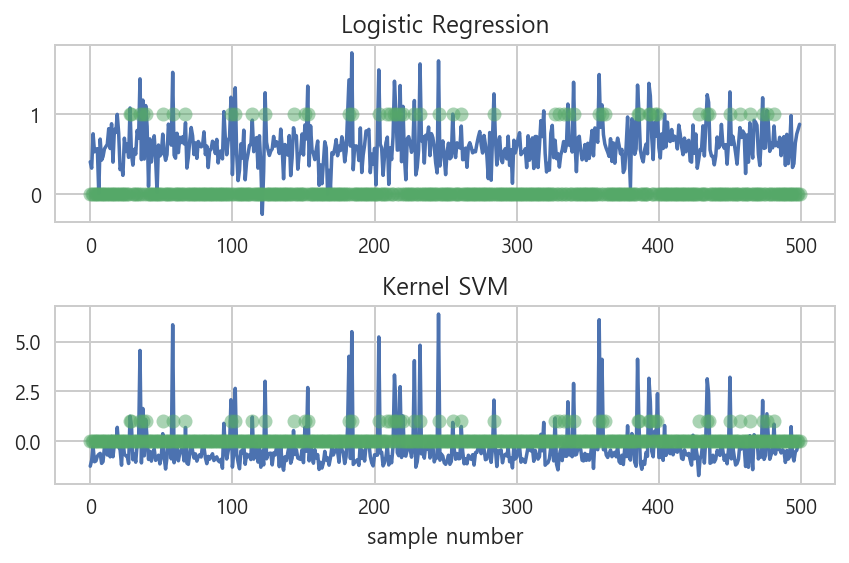

In [12]:
N = 500

plt.subplot(211)
plt.plot(model1.decision_function(X[:N]) * 0.1 + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X[:N]) + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Kernel SVM")
plt.xlabel("sample number")

plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)


(0.92278937981408082, 0.94863250304552793)

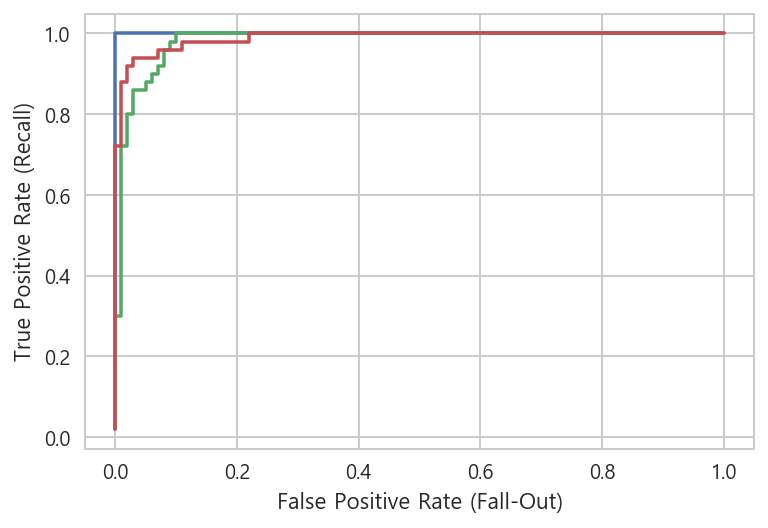

In [14]:
# 다중클래스 성능평가

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()


# 로지스틱함수 - 시그모이드

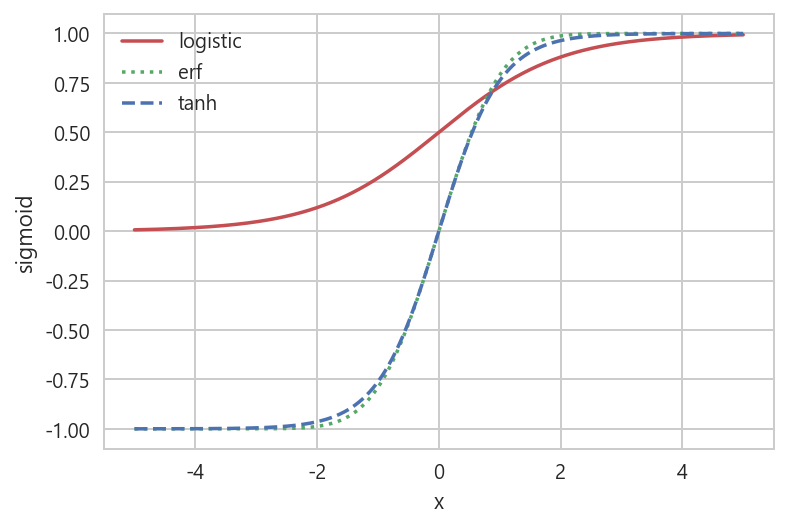

In [15]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="logistic")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="erf")
plt.plot(xx, np.tanh(xx), 'b--', label="tanh")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.ylabel("sigmoid")
plt.show()


In [16]:
#로지스틱 회귀
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)


In [17]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        15:52:30   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


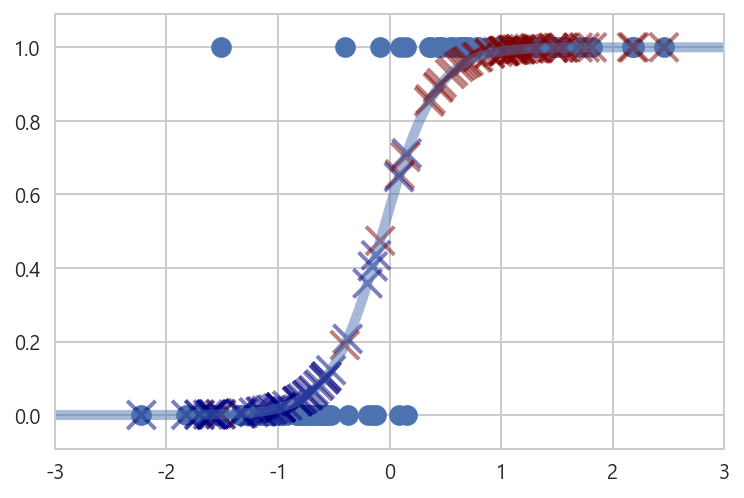

In [18]:
xx = np.linspace(-3, 3, 100)
theta = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, theta, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()


In [21]:
# scikitLearn으로 하는경우 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X0, y)

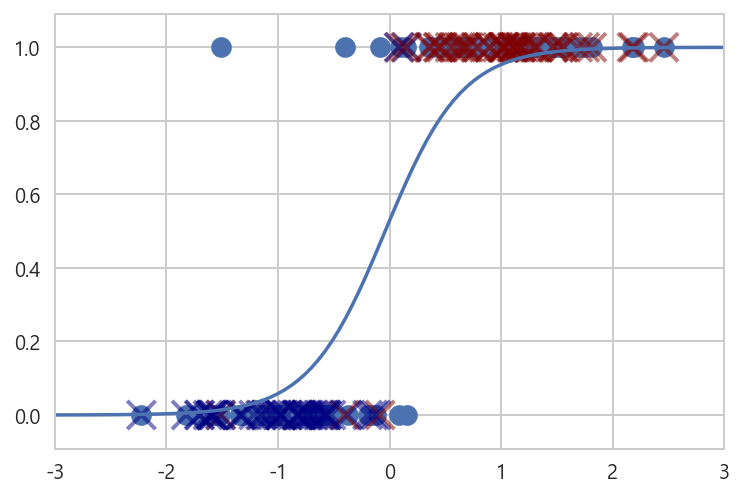

In [20]:
xx = np.linspace(-3, 3, 100)
theta = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))
plt.plot(xx, theta)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, model.predict(X0), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()


## 미쉐린가이드 평점예측


In [22]:
# 미쉐린가이드 평점예측

df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()


,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


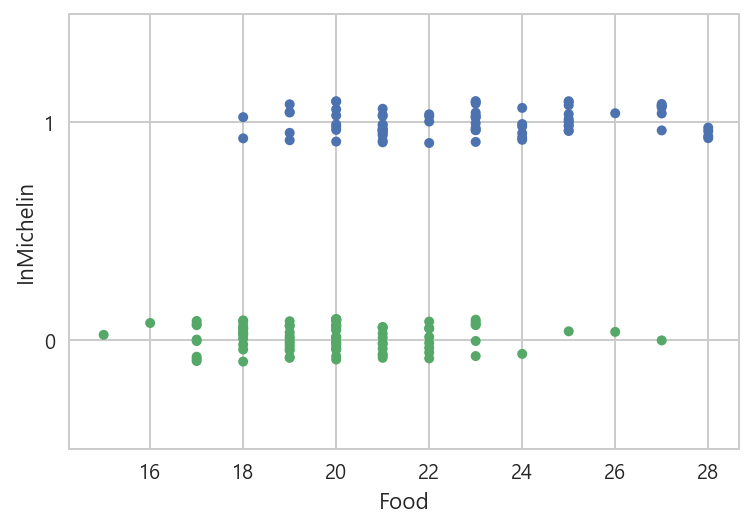

In [23]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()


In [24]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
result = model.fit(disp=0)
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.3428
Time:                        16:10:20   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.2

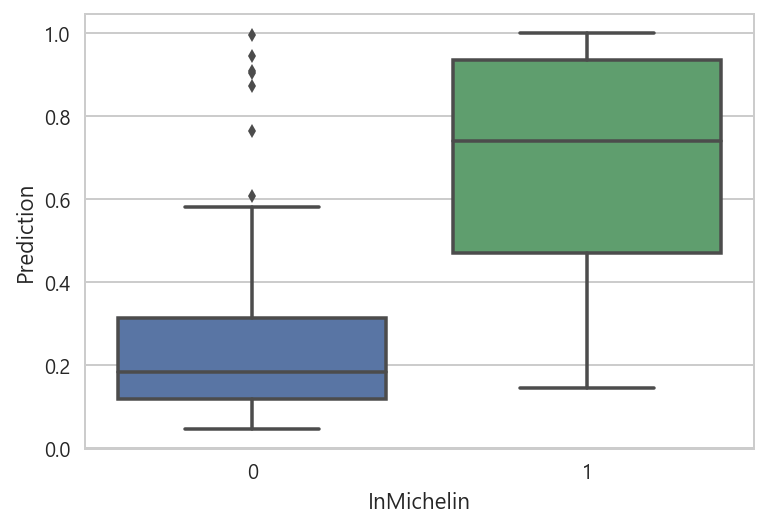

In [25]:
df["Prediction"] = result.predict(df)
sns.boxplot(x="InMichelin", y="Prediction", data=df)
plt.show()


# 붓꽃 분류문제 회귀분석

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.DESCR)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
# df['species'].unique()
dfnew = df[df['species']!='virginica']
dfnew['species'].unique()



[setosa, versicolor]
Categories (2, object): [setosa, versicolor]

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = dfnew['species']
le.fit(y)
dfnew['species_c'] = le.transform(y)

dfnew.columns = ['sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species', 'species_c']
dfnew.tail()

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,sepal_length,sepal_width,petal_length,petal_width,species,species_c
95,5.7,3.0,4.2,1.2,versicolor,1
96,5.7,2.9,4.2,1.3,versicolor,1
97,6.2,2.9,4.3,1.3,versicolor,1
98,5.1,2.5,3.0,1.1,versicolor,1
99,5.7,2.8,4.1,1.3,versicolor,1


In [33]:
model = sm.Logit.from_formula("species_c ~ sepal_length", dfnew)
result = model.fit(disp=0)
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:              species_c   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.5368
Time:                        16:26:24   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113


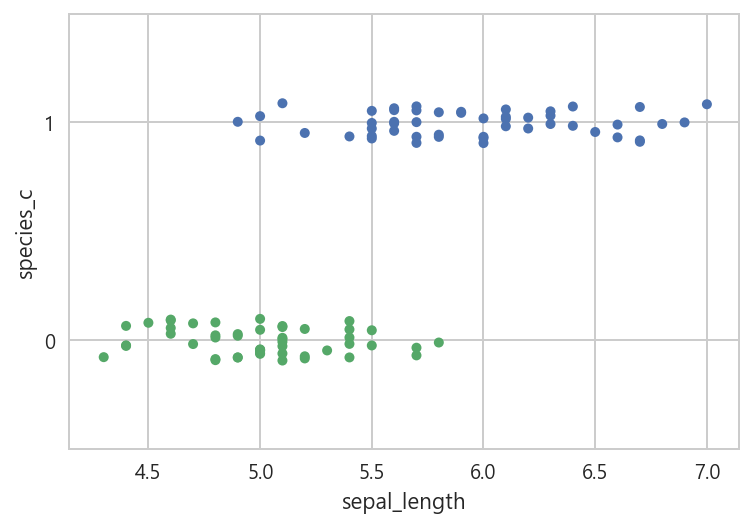

In [35]:
sns.stripplot(x="sepal_length", y="species_c", data=dfnew, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()


C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


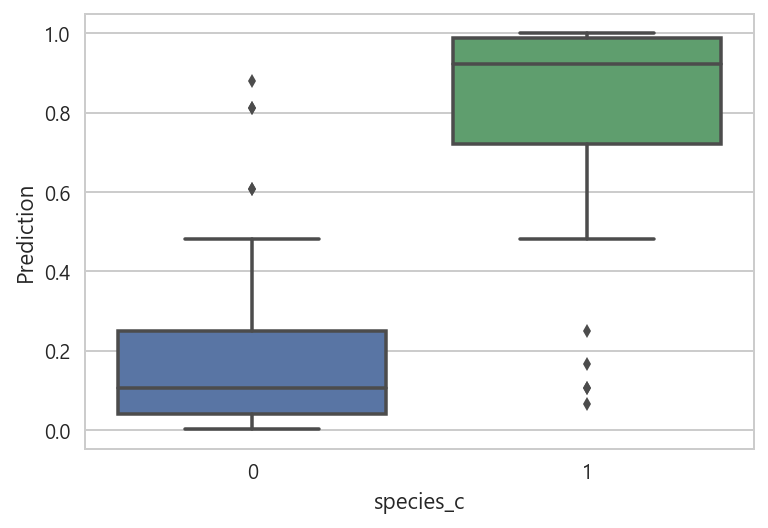

In [34]:
dfnew["Prediction"] = result.predict(dfnew)
sns.boxplot(x="species_c", y="Prediction", data=dfnew)
plt.show()

In [38]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = dfnew["species_c"]
y_pred = (dfnew["Prediction"]>0.5)
confusion_matrix(y_true, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [73]:
#classifycation report
from sklearn.metrics import *

y_true = dfnew["species_c"]
y_pred = (dfnew["Prediction"]>0.5)
target_names = ['0/setosa', '1/versicolor']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    0/setosa       0.88      0.90      0.89        50
1/versicolor       0.90      0.88      0.89        50

 avg / total       0.89      0.89      0.89       100



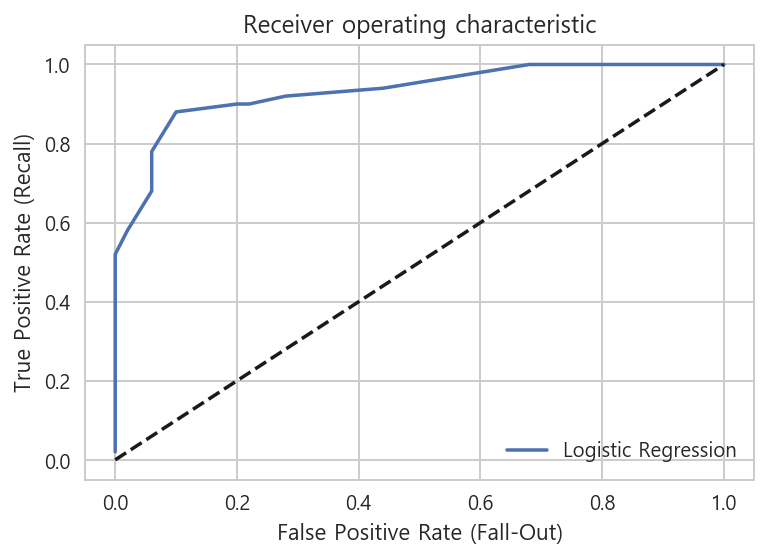

In [69]:
#ROC
fpr1, tpr1, thresholds1 = roc_curve(y_true, dfnew["Prediction"].values)

plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic')
plt.show()


In [70]:
#AUC
from sklearn.metrics import auc
auc(fpr1, tpr1)

0.93259999999999987

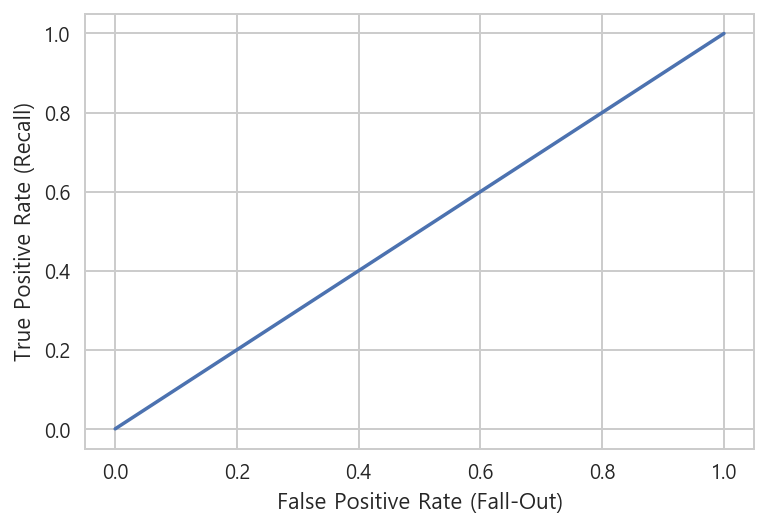

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [105]:
#AUC 면적그리기는 실패애~

from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = dfnew.iloc[:,0].values.reshape(-1,1)
y = label_binarize(y_true, [0, 1])

fpr = [None] * 1
tpr = [None] * 1
thr = [None] * 1

for i in range(1):
    fpr[i], tpr[i], thr[i] = roc_curve(y[:], model.predict(X)[:])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()
iris.target
y

# QDA,LDA

In [106]:
# QDA
N = 100
np.random.seed(0)
X1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0], [0, 0.7]]).rvs(100)
X2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
X3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

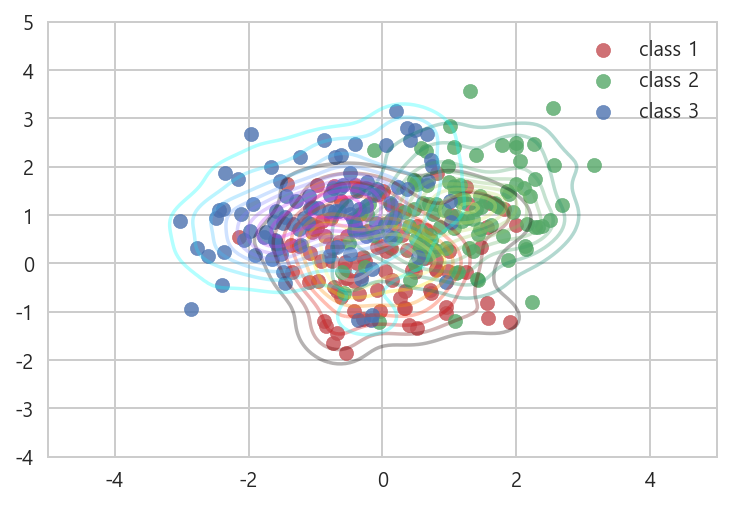

In [107]:
plt.scatter(X1[:,0], X1[:,1], alpha=0.8, s=50, color='r', label="class 1")
plt.scatter(X2[:,0], X2[:,1], alpha=0.8, s=50, color='g', label="class 2")
plt.scatter(X3[:,0], X3[:,1], alpha=0.8, s=50, color='b', label="class 3")
sns.kdeplot(X1[:,0], X1[:,1], alpha=0.3, cmap=mpl.cm.hot)
sns.kdeplot(X2[:,0], X2[:,1], alpha=0.3, cmap=mpl.cm.summer)
sns.kdeplot(X3[:,0], X3[:,1], alpha=0.3, cmap=mpl.cm.cool)
plt.xlim(-5,5)
plt.ylim(-4,5)
plt.legend()
plt.show()


In [108]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y)

In [109]:
qda.means_

array([[ -8.01254084e-04,   1.19457204e-01],
       [  1.16303727e+00,   1.03930605e+00],
       [ -8.64060404e-01,   1.02295794e+00]])

In [111]:
qda.covariance_[0]

array([[ 0.73846319, -0.01762041],
       [-0.01762041,  0.72961278]])

In [112]:
qda.covariance_[1]

array([[ 0.66534246,  0.21132313],
       [ 0.21132313,  0.78806006]])

In [114]:
qda.covariance_[2]

array([[ 0.9351386 ,  0.22880955],
       [ 0.22880955,  0.79142383]])

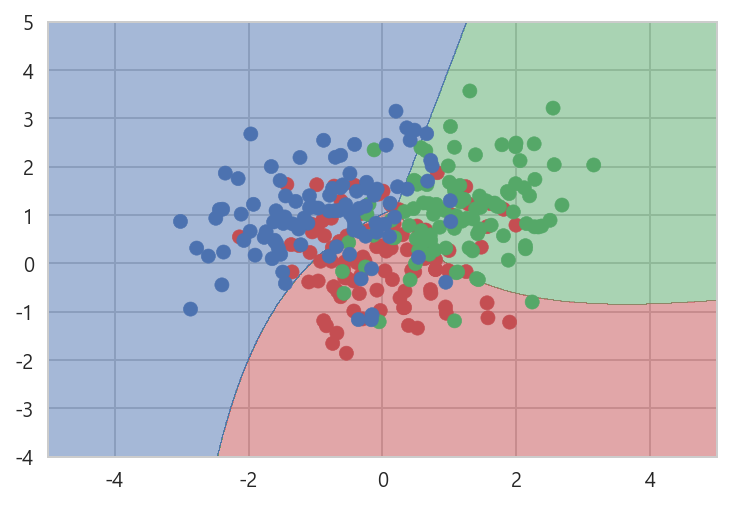

In [115]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), 
                     np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), 
                XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()


In [ ]:
#LDA
